In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px

**Exploratory Data Analysis**

In [53]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="latin1")

In [54]:
data.head()

eventid  iyear  imonth  iday  country         country_txt  region  \
0  1.970000e+11   1970       7     2       58  Dominican Republic       2   
1  1.970000e+11   1970       0     0      130              Mexico       1   
2  1.970010e+11   1970       1     0      160         Philippines       5   
3  1.970010e+11   1970       1     0       78              Greece       8   
4  1.970010e+11   1970       1     0      101               Japan       4   

                    region_txt provstate           city  ...  addnotes  \
0  Central America & Caribbean       NaN  Santo Domingo  ...       NaN   
1                North America   Federal    Mexico city  ...       NaN   
2               Southeast Asia    Tarlac        Unknown  ...       NaN   
3               Western Europe    Attica         Athens  ...       NaN   
4                    East Asia   Fukouka        Fukouka  ...       NaN   

   scite1  scite2  scite3 dbsource INT_LOG  INT_IDEO  INT_MISC  INT_ANY  \
0     NaN     NaN     NaN     PGIS     0.0       0.0       0.0      0.0   
1     NaN     NaN     NaN     PGIS     0.0       1.0       1.0      1.0   
2     NaN     NaN     NaN     PGIS    -9.0      -9.0       1.0      1.0   
3     NaN     NaN     NaN     PGIS    -9.0      -9.0       1.0      1.0   
4     NaN     NaN     NaN     PGIS    -9.0      -9.0       1.0      1.0   

   related  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 92 columns]

In [55]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 156597
Number of columns: 92


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156597 entries, 0 to 156596
Data columns (total 92 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             156597 non-null  float64
 1   iyear               156597 non-null  int64  
 2   imonth              156597 non-null  int64  
 3   iday                156597 non-null  int64  
 4   country             156597 non-null  int64  
 5   country_txt         156597 non-null  object 
 6   region              156597 non-null  int64  
 7   region_txt          156597 non-null  object 
 8   provstate           156178 non-null  object 
 9   city                156163 non-null  object 
 10  latitude            152152 non-null  float64
 11  longitude           152151 non-null  float64
 12  specificity         156591 non-null  float64
 13  vicinity            156597 non-null  int64  
 14  location            42061 non-null   object 
 15  summary             90470 non-null

In [57]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.565970e+05  156597.000000  156597.000000  156597.000000   
mean   2.000497e+11    2000.432799       6.465622      15.433284   
std    1.298746e+09      12.987313       3.381064       8.813720   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.989080e+11    1989.000000       4.000000       8.000000   
50%    2.005060e+11    2005.000000       6.000000      15.000000   
75%    2.013050e+11    2013.000000       9.000000      23.000000   
max    2.015120e+11    2015.000000      12.000000      31.000000   

             country         region       latitude     longitude  \
count  156597.000000  156597.000000  152152.000000  1.521510e+05   
mean      133.150380       6.968294      23.186107 -5.423805e+02   
std       114.109068       2.969116      19.234105  2.209525e+05   
min         4.000000       1.000000     -53.154613 -8.618590e+07   
25%        69.000000       5.000000      10.744547 -1.977903e+00   
50%       101.000000       6.000000      31.262898  4.184471e+01   
75%       160.000000      10.000000      34.851188  6.841533e+01   
max      1004.000000      12.000000      74.633553  1.793667e+02   

        specificity       vicinity  ...        ransom     ransomamt  \
count  156591.00000  156597.000000  ...  75065.000000  1.208000e+03   
mean        1.44910       0.067536  ...     -0.143782  3.498924e+06   
std         1.01462       0.288255  ...      1.194899  3.191959e+07   
min         1.00000      -9.000000  ...     -9.000000 -9.900000e+01   
25%         1.00000       0.000000  ...      0.000000  0.000000e+00   
50%         1.00000       0.000000  ...      0.000000  1.500000e+04   
75%         1.00000       0.000000  ...      0.000000  4.651725e+05   
max         5.00000       1.000000  ...      1.000000  1.000000e+09   

        ransomamtus    ransompaid  hostkidoutcome    nreleased        INT_LOG  \
count  4.220000e+02  6.330000e+02     8676.000000  8084.000000  156596.000000   
mean   7.717486e+05  4.375698e+05        4.568580   -26.907224      -4.597257   
std    8.168589e+06  2.575255e+06        2.049649    66.338934       4.543251   
min   -9.900000e+01 -9.900000e+01        1.000000   -99.000000      -9.000000   
25%    0.000000e+00 -9.900000e+01        2.000000   -99.000000      -9.000000   
50%    0.000000e+00  0.000000e+00        4.000000     0.000000      -9.000000   
75%    0.000000e+00  4.880000e+03        7.000000     1.000000       0.000000   
max    1.320000e+08  4.100000e+07        7.000000  2769.000000       1.000000   

            INT_IDEO       INT_MISC        INT_ANY  
count  156596.000000  156596.000000  156596.000000  
mean       -4.530991       0.094306      -3.973601  
std         4.624733       0.604406       4.690618  
min        -9.000000      -9.000000      -9.000000  
25%        -9.000000       0.000000      -9.000000  
50%        -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 58 columns]

In [58]:
data.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
country          0
             ...  
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related     136079
Length: 92, dtype: int64

In [59]:
# renaming the columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Targettype','weaptype1_txt':'Weapontype','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','AttackType','Target','Killed','Wounded','Summary','Group'
,'Motive']]

#concatenating columns
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualty"]=data["Killed"]+data["Wounded"]
data.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

                       AttackType                   Target  Killed  Wounded  \
0                   Assassination             Julio Guzman     1.0      0.0   
1     Hostage Taking (Kidnapping)  Nadine Chaval, daughter     0.0      0.0   
2                   Assassination                 Employee     1.0      0.0   
3               Bombing/Explosion             U.S. Embassy     0.0      0.0   
4  Facility/Infrastructure Attack           U.S. Consulate     0.0      0.0   

  Summary                               Group Motive  Casualty  
0     NaN                              MANO-D    NaN       1.0  
1     NaN  23rd of September Communist League    NaN       0.0  
2     NaN                             Unknown    NaN       1.0  
3     NaN                             Unknown    NaN       0.0  
4     NaN                             Unknown    NaN       0.0

Data visualization

In [60]:
# Define colors for each bar
colors = ['lightslategray',] * 11
colors[0] = 'crimson'

x = data['Country'].value_counts().index.tolist()
y = data['Country'].value_counts().tolist()

#Bar chart
fig = go.Figure(data=[go.Bar(
    x=x,
    y=y,
    marker_color=colors,
    text=y,
    textposition='auto'
)])

# Layout
fig.update_layout(
    title_text='Countries with the highest number of terrorist attacks',
    xaxis_title="Countries",
    yaxis_title="Sum of occurrences"
)

fig.show()


In [61]:
colors = ['lightslategray',] * 13
colors[11] = 'crimson'
x=data['Region'].value_counts().sort_values().index
y=data['Region'].value_counts().sort_values()
fig = go.Figure(data=[go.Bar(
    x=y.tolist(),
    y=x.tolist(),
    marker_color=colors,text=y,orientation='h',
            textposition='auto'
)])
fig.update_layout(title_text='Regions having highest terrorist attacks', xaxis_title="Regions",
    yaxis_title="Sum of occurences",)

In [62]:
#Terrorist activities each year
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig_bar = px.histogram(data, x="Region", y="Killed",
                 animation_frame="Year",
                 color_discrete_sequence=colors)

fig_bar.update_yaxes(showgrid=False)
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)

fig_bar.update_layout(
    margin=dict(t=70, b=0, l=70, r=40),
    hovermode="x unified",
    xaxis_tickangle=45,
    xaxis_title=' ',
    yaxis_title=" ",
    plot_bgcolor='#f0f0f0',
    paper_bgcolor='#f0f0f0',
    title_font=dict(size=25, color='#a6a7ab', family="Lato, sans-serif"),
    font=dict(color='#8a8d93'),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Change bar color
for trace, color in zip(fig_bar.data, colors):
    trace.marker.color = color

fig_bar.show()


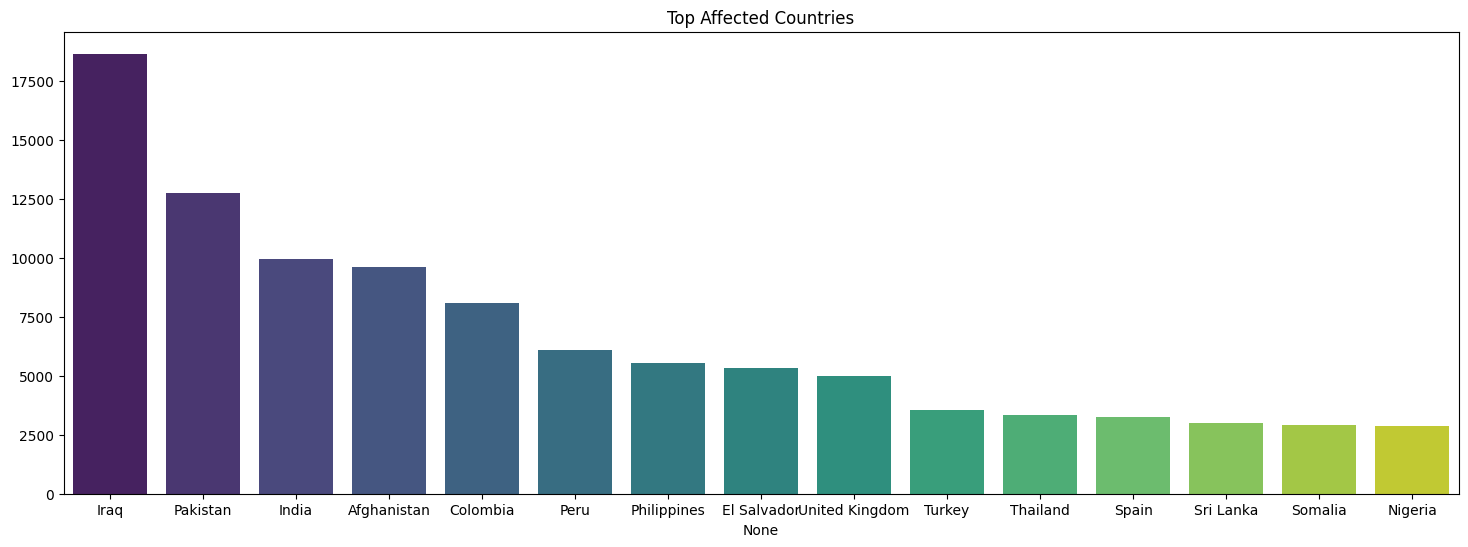

In [63]:
plt.subplots(figsize=(18, 6))
sns.barplot(x=data['Country'].value_counts()[:15].index, y=data['Country'].value_counts()[:15].values, palette='viridis')
plt.title('Top Affected Countries')
plt.show()

In [64]:
casualty=data.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 806631.0
